In [5]:
#!pip install yfinance
#!pip install matplotlib
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
#Importa libs
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Configurações iniciais
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [8]:
# Coleta de dados da BBAS3
symbol = "BBAS3.SA"
start_date = "2018-01-01"
end_date = "2024-07-20"

df = yf.download(symbol, start=start_date, end=end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [9]:
# Visualizar as primeiras linhas
df.head()

Price,Close,High,Low,Open,Volume
Ticker,BBAS3.SA,BBAS3.SA,BBAS3.SA,BBAS3.SA,BBAS3.SA
Date,,,,,
2018-01-02,10.452987,10.452987,10.186345,10.186345,18356200
2018-01-03,10.586313,10.608533,10.418075,10.506956,16361400
2018-01-04,10.687888,10.779943,10.618054,10.640274,19250400
2018-01-05,10.687888,10.760898,10.567265,10.697412,10535600
2018-01-08,10.713283,10.713283,10.583136,10.678365,10261200


In [10]:
# Verificar se há valores nulos
print(df.isnull().sum())

Price   Ticker  
Close   BBAS3.SA    0
High    BBAS3.SA    0
Low     BBAS3.SA    0
Open    BBAS3.SA    0
Volume  BBAS3.SA    0
dtype: int64


In [11]:
# Preencher ou remover nulos
df = df.dropna()

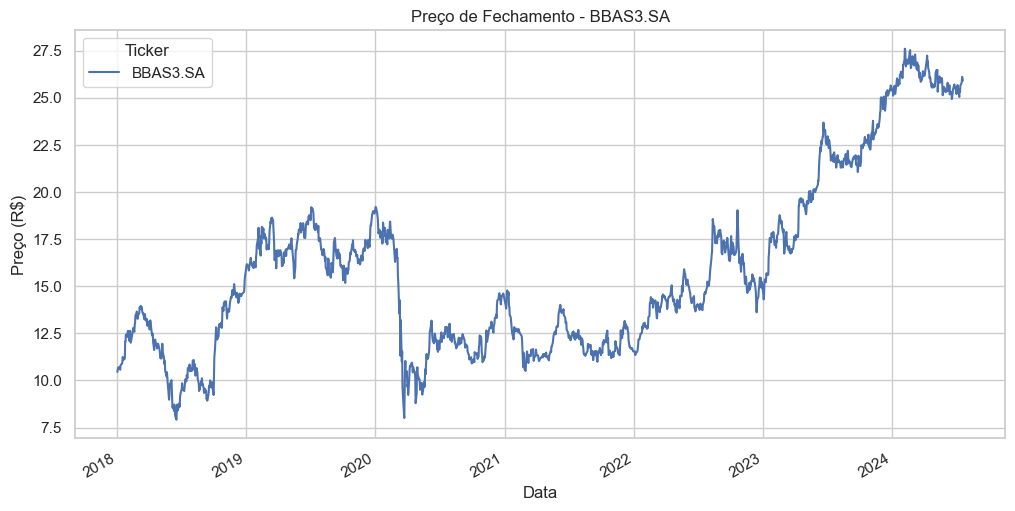

In [12]:
# Plotar o fechamento ao longo do tempo
df["Close"].plot(title=f"Preço de Fechamento - {symbol}")
plt.xlabel("Data")
plt.ylabel("Preço (R$)")
plt.show()

In [13]:
# Média móvel de 20 e 50 dias
df["MA20"] = df["Close"].rolling(window=20).mean()
df["MA50"] = df["Close"].rolling(window=50).mean()

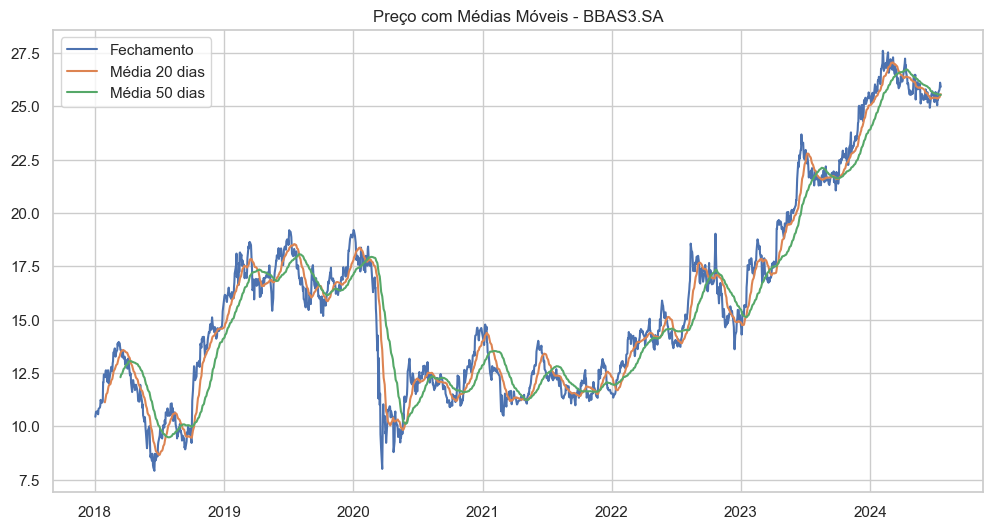

In [14]:
# Plotar com médias móveis
plt.plot(df["Close"], label="Fechamento")
plt.plot(df["MA20"], label="Média 20 dias")
plt.plot(df["MA50"], label="Média 50 dias")
plt.title(f"Preço com Médias Móveis - {symbol}")
plt.legend()
plt.show()

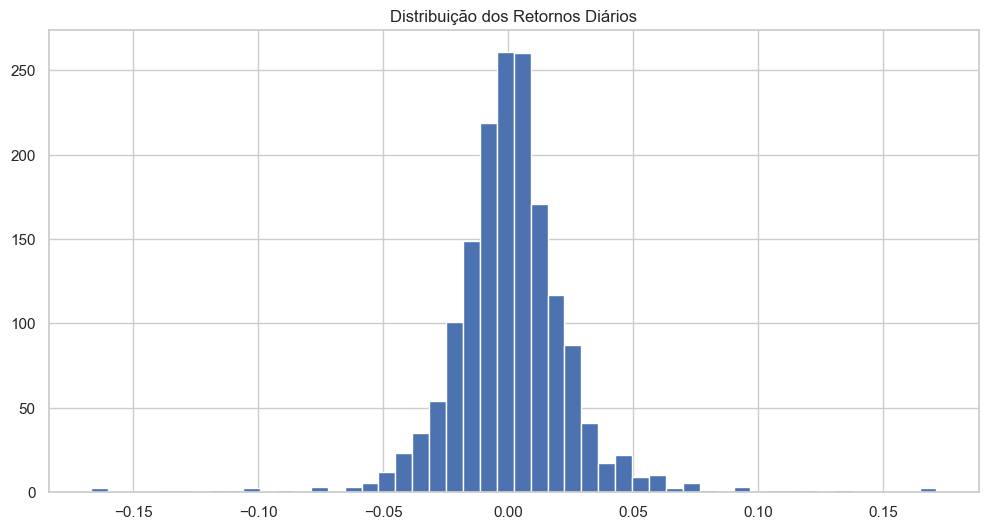

In [15]:
# Histograma dos retornos diários
df["Return"] = df["Close"].pct_change()
df["Return"].hist(bins=50)
plt.title("Distribuição dos Retornos Diários")
plt.show()

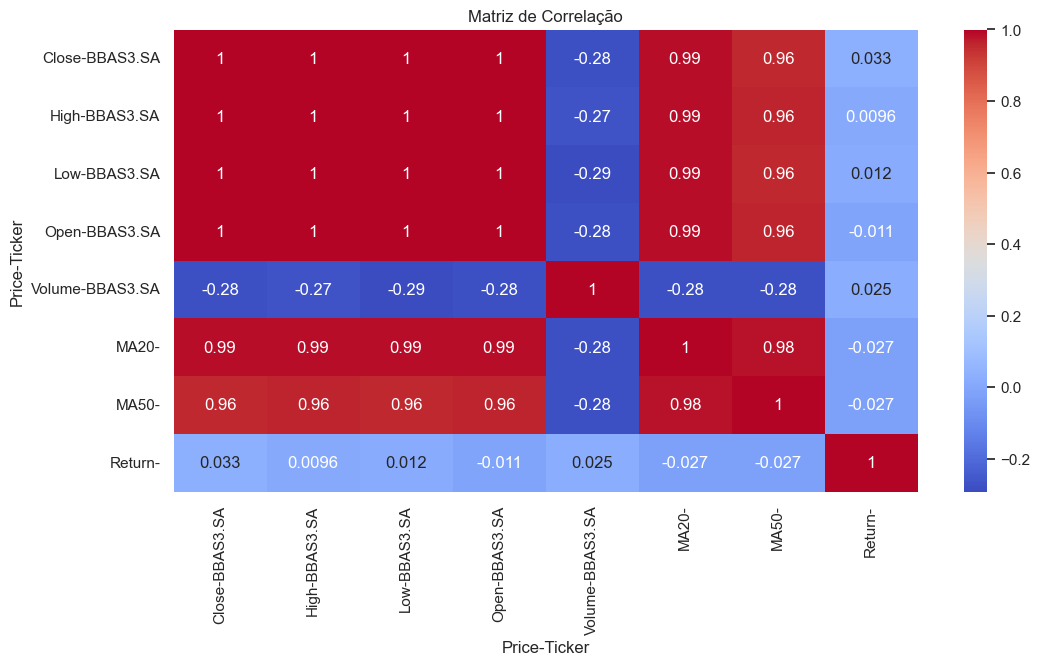

In [16]:
# Correlação entre as variáveis
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

ModuleNotFoundError: No module named 'app'